In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import plotting
import os
import tensorflow as tf
 
#  The path below is needed when running on Scully computer.
os.environ['PATH'] = '/home/xilinx/Vivado/2019.1/bin:' + os.environ['PATH'] 

2023-02-20 19:06:54.793418: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
#from tensorflow.keras.models import load_model

In [3]:
import tensorflow 

In [4]:
from qkeras.utils import load_qmodel

In [5]:
model = load_qmodel('qkL1JetTagModel.h5')
#qkL1JetTagModel.h5 has QActivation("sigmoid")
#qkL1JetTagModel.h5 has Activation("sigmoid")

2023-02-20 19:07:05.744045: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-02-20 19:07:05.747258: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-02-20 19:07:05.778667: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-20 19:07:05.778926: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: NVIDIA GeForce GT 1030 computeCapability: 6.1
coreClock: 1.5185GHz coreCount: 3 deviceMemorySize: 1.95GiB deviceMemoryBandwidth: 44.76GiB/s
2023-02-20 19:07:05.778938: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-02-20 19:07:05.782879: I tensorflow/stream_executor/platform/defa

In [6]:
!pwd

/home/users/russelld/L1JetTagDaniel


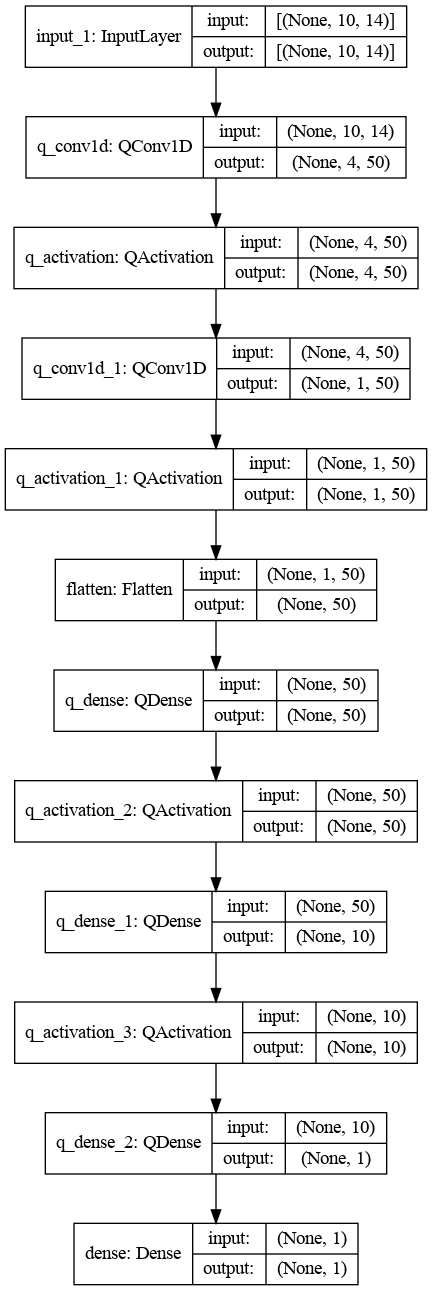

In [7]:
tensorflow.keras.utils.plot_model(model, show_shapes=True)

In [8]:
import hls4ml
config = hls4ml.utils.config_from_keras_model(model, granularity='name')
print("-----------------------------------")
#plotting.print_dict(config)
#print("-----------------------------------")

Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 10, 14]], output shape: [None, 10, 14]
Layer name: q_conv1d, layer type: QConv1D, input shapes: [[None, 10, 14]], output shape: [None, 4, 50]
Layer name: q_activation, layer type: Activation, input shapes: [[None, 4, 50]], output shape: [None, 4, 50]
Layer name: q_conv1d_1, layer type: QConv1D, input shapes: [[None, 4, 50]], output shape: [None, 1, 50]
Layer name: q_activation_1, layer type: Activation, input shapes: [[None, 1, 50]], output shape: [None, 1, 50]
Layer name: flatten, layer type: Reshape, input shapes: [[None, 1, 50]], output shape: [None, 50]
Layer name: q_dense, layer type: QDense, input shapes: [[None, 50]], output shape: [None, 50]
Layer name: q_activation_2, layer type: Activation, input shapes: [[None, 50]], output shape: [None, 50]
Layer name: q_dense_1, layer type: QDense, input shapes: [[None, 50]], output shape: [None, 10]
Layer name: q_activation_3, layer type: Activ

/home/users/russelld/miniconda3/envs/L1JetTag/lib/python3.8/site-packages/hls4ml/converters/__init__.py:24: UserWarning: WARNING: Pytorch converter is not enabled!
  warnings.warn("WARNING: Pytorch converter is not enabled!")


In [9]:
config['LayerName']['q_conv1d']['ReuseFactor'] = 10
#config['LayerName']['q_activation_quantized_relu']['ReuseFactor'] = 10
config['LayerName']['q_conv1d_1']['ReuseFactor'] = 10
config['LayerName']['q_activation_1']['ReuseFactor'] = 10
config['LayerName']['q_dense_1']['ReuseFactor'] = 10
config['LayerName']['q_dense_2']['ReuseFactor'] = 10

In [10]:
hls_model = hls4ml.converters.convert_from_keras_model(model,
                                                       hls_config=config,
                                                       output_dir='model_1/hls4ml_prj',
                                                       part='xcu250-figd2104-2L-e')

Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 10, 14]], output shape: [None, 10, 14]
Layer name: q_conv1d, layer type: QConv1D, input shapes: [[None, 10, 14]], output shape: [None, 4, 50]
Layer name: q_activation, layer type: Activation, input shapes: [[None, 4, 50]], output shape: [None, 4, 50]
Layer name: q_conv1d_1, layer type: QConv1D, input shapes: [[None, 4, 50]], output shape: [None, 1, 50]
Layer name: q_activation_1, layer type: Activation, input shapes: [[None, 1, 50]], output shape: [None, 1, 50]
Layer name: flatten, layer type: Reshape, input shapes: [[None, 1, 50]], output shape: [None, 50]
Layer name: q_dense, layer type: QDense, input shapes: [[None, 50]], output shape: [None, 50]
Layer name: q_activation_2, layer type: Activation, input shapes: [[None, 50]], output shape: [None, 50]
Layer name: q_dense_1, layer type: QDense, input shapes: [[None, 50]], output shape: [None, 10]
Layer name: q_activation_3, layer type: Activ

$N_{multiplications}$ = $\sum^N_{n=2}$ $L_{n-1} * L_{n}$

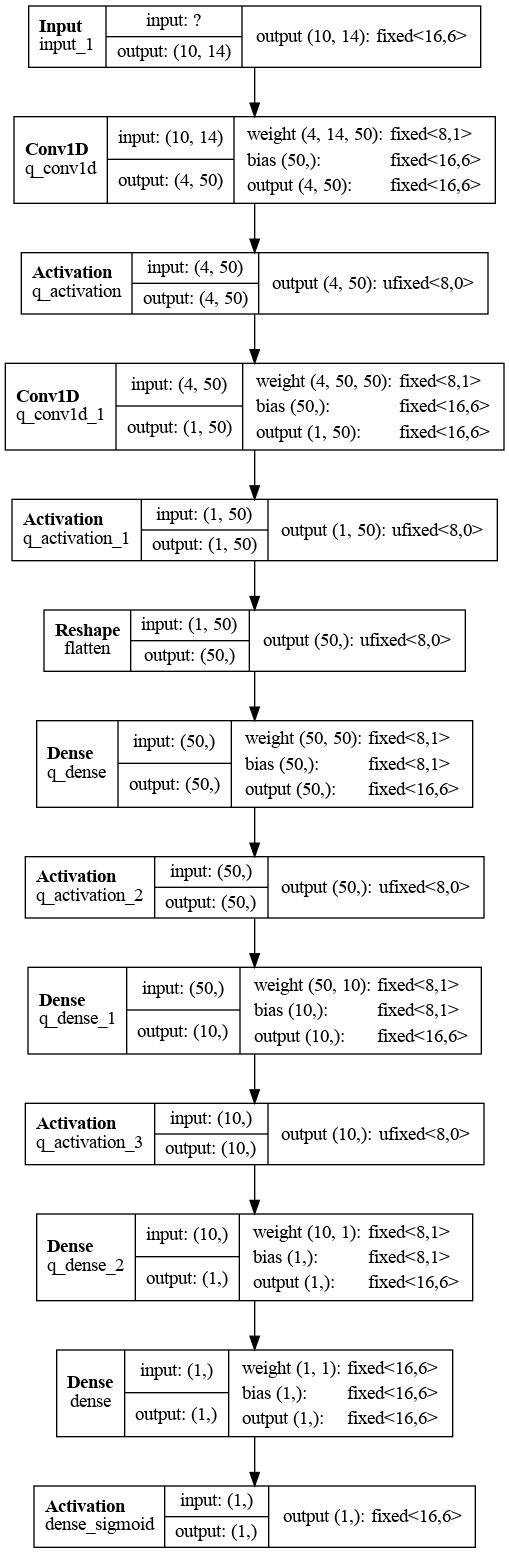

In [11]:
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file=None)

In [12]:
hls_model.compile()

Writing HLS project
Done


In [13]:
hls_model.build(csim=False)


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2019.1 (64-bit)
  **** SW Build 2552052 on Fri May 24 14:47:09 MDT 2019
  **** IP Build 2548770 on Fri May 24 18:01:18 MDT 2019
    ** Copyright 1986-2019 Xilinx, Inc. All Rights Reserved.

source /home/xilinx/Vivado/2019.1/scripts/vivado_hls/hls.tcl -notrace
INFO: Applying HLS Y2K22 patch v1.2 for IP revision
INFO: [HLS 200-10] Running '/home/xilinx/Vivado/2019.1/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'russelld' on host 'scully.physics.ucsd.edu' (Linux_x86_64 version 4.18.0-348.12.2.el8_5.x86_64) on Mon Feb 20 19:07:39 PST 2023
INFO: [HLS 200-10] In directory '/home/users/russelld/L1JetTagDaniel/model_1/hls4ml_prj'
Sourcing Tcl script 'build_prj.tcl'
INFO: [HLS 200-10] Opening project '/home/users/russelld/L1JetTagDaniel/model_1/hls4ml_prj/myproject_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/myproject.cpp' to the project
INFO: [HLS 200-10] Adding test bench file 'myproject_test.cpp

INFO: [HLS 200-111] Finished Standard Transforms Time (s): cpu = 00:00:18 ; elapsed = 00:00:20 . Memory (MB): peak = 1124.199 ; gain = 203.812 ; free physical = 4915 ; free virtual = 43574
INFO: [HLS 200-10] Checking synthesizability ...
INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::mantissa' into 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' (/wrk/2019.1/continuous/2019_05_24_2552052/src/products/hls/hls_lib/hlsmath/include/FloatingPoint/hls_case_IEEE754.h:15) automatically.
INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::expv' into 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' (/wrk/2019.1/continuous/2019_05_24_2552052/src/products/hls/hls_lib/hlsmath/include/FloatingPoint/hls_case_IEEE754.h:18) automatically.
INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::__signbit' into 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' (/wrk/2019.1/continuous/2019_05_24_2552052/src/products/hls/hls_lib/hlsmath/include/FloatingPoint/hls_case_IEEE754.h:5

INFO: [HLS 200-489] Unrolling loop 'Result' (firmware/nnet_utils/nnet_dense_resource.h:98) in function 'nnet::dense_resource<ap_ufixed<8, 0, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config12>' completely with a factor of 10.
INFO: [HLS 200-489] Unrolling loop 'Loop-1' (firmware/nnet_utils/nnet_activation.h:69) in function 'nnet::relu<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_ufixed<8, 0, (ap_q_mode)5, (ap_o_mode)3, 0>, relu_config11>' completely with a factor of 50.
INFO: [HLS 200-489] Unrolling loop 'InitAccum' (firmware/nnet_utils/nnet_dense_resource.h:58) in function 'nnet::dense_resource<ap_ufixed<8, 0, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config9>' completely with a factor of 50.
INFO: [HLS 200-489] Unrolling loop 'ReuseLoop' (firmware/nnet_utils/nnet_dense_resource.h:64) in function 'nnet::dense_resource<ap_ufixed<8, 0, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mod

INFO: [XFORM 203-101] Partitioning array 'data_buf.i'  in dimension 2 completely.
INFO: [XFORM 203-101] Partitioning array 'acc.V' (firmware/nnet_utils/nnet_conv1d_resource.h:30) in dimension 2 completely.
INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::mantissa' into 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' (/wrk/2019.1/continuous/2019_05_24_2552052/src/products/hls/hls_lib/hlsmath/include/FloatingPoint/hls_case_IEEE754.h:15) automatically.
INFO: [XFORM 203-602] Inlining function 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' into 'generic_cast_IEEE754<int, double>' (/wrk/2019.1/continuous/2019_05_24_2552052/src/products/hls/hls_lib/hlsmath/include/FloatingPoint/hls_case_IEEE754.h:117) automatically.
INFO: [XFORM 203-602] Inlining function 'generic_cast_IEEE754<int, double>' into '__hls_fptosi_double_i32' (/wrk/2019.1/continuous/2019_05_24_2552052/src/products/hls/hls_lib/hlsmath/src/lib_floatconversion.cpp:55) automatically.
INFO: [XFORM 203-602] Inlining func

INFO: [XFORM 203-11] Balancing expressions in function 'nnet::conv_1d_cl<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config2>' (firmware/nnet_utils/nnet_conv1d_latency.h:36:59)...5482 expression(s) balanced.
INFO: [HLS 200-111] Finished Pre-synthesis Time (s): cpu = 00:06:15 ; elapsed = 00:06:20 . Memory (MB): peak = 8670.602 ; gain = 7750.215 ; free physical = 3931 ; free virtual = 39838
INFO: [XFORM 203-531] Rewinding loop 'ReuseLoop' (firmware/nnet_utils/nnet_dense_resource.h:64) in function 'dense_resource<ap_ufixed,ap_fixed,config15>'.
INFO: [XFORM 203-531] Rewinding loop 'ReuseLoop' (firmware/nnet_utils/nnet_conv1d_resource.h:51) in function 'conv_1d_cl<ap_ufixed,ap_fixed<16,6,5,3,0>,config5>'.
INFO: [XFORM 203-531] Rewinding loop 'ReuseLoop' (firmware/nnet_utils/nnet_dense_resource.h:64) in function 'dense_resource<ap_ufixed,ap_fixed,config12>'.
INFO: [HLS 200-111] Finished Architecture Synthesis Time (s): cpu = 00:08:32 ; elap

INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 0.92 seconds; current allocated memory: 1.128 GB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'conv_1d_cl_ap_fixed_ap_fixed_16_6_5_3_0_config2_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-61] Pipelining loop 'PartitionLoop'.
INFO: [SCHED 204-61] Pipelining result : Target II = 10, Final II = 5, Depth = 5.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 25.11 seconds; current allocated memory: 1.171 GB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 

INFO: [HLS 200-111]  Elapsed time: 1.03 seconds; current allocated memory: 1.586 GB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 0.15 seconds; current allocated memory: 1.586 GB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'dense_resource_ap_ufixed_ap_fixed_config15_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-61] Pipelining loop 'ReuseLoop'.
INFO: [SCHED 204-61] Pipelining result : Target II = 1, Final II = 1, Depth = 2.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 0.2 seconds; current allocated memory: 1.586 GB.
INF

INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'dense_resource_ap_ufixed_ap_fixed_config12_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [RTGEN 206-100] Generating core module 'myproject_mux_164_8_1_1': 50 instance(s).
INFO: [RTGEN 206-100] Finished creating RTL model for 'dense_resource_ap_ufixed_ap_fixed_config12_s'.
INFO: [HLS 200-111]  Elapsed time: 2.7 seconds; current allocated memory: 3.985 GB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'relu_ap_fixed_ap_ufixed_8_0_5_3_0_relu_config14_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [RTGEN 206-100] Finished creating RTL model for 'relu_ap_fixed_ap_ufixed_8_0_5_3_0_relu_config14_s'.
INFO: [HLS 200-111]  Elapsed time: 3.59 seconds; current allocated memory: 3.994 GB.
I

INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_46_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_47_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_48_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_49_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_50_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_51_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_52_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_53_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_54_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_55_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implement

INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_134_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_135_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_136_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_137_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_138_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_139_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_140_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_141_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_142_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_143_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285]

INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_26_V_U(fifo_w8_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_27_V_U(fifo_w8_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_28_V_U(fifo_w8_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_29_V_U(fifo_w8_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_30_V_U(fifo_w8_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_31_V_U(fifo_w8_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_32_V_U(fifo_w8_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_33_V_U(fifo_w8_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_34_V_U(fifo_w8_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_35_V_U(fifo_w8_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO '

INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_114_V_U(fifo_w8_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_115_V_U(fifo_w8_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_116_V_U(fifo_w8_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_117_V_U(fifo_w8_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_118_V_U(fifo_w8_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_119_V_U(fifo_w8_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_120_V_U(fifo_w8_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_121_V_U(fifo_w8_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_122_V_U(fifo_w8_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_123_V_U(fifo_w8_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implement

INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_4_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_9_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_10_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_12_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_13_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_18_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_20_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_21_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_22_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_24_V_U(fifo_w16_d2_A)' using Shift Registers.
INFO: [RTMG 210-285] Implementin

INFO: [VHDL 208-304] Generating VHDL RTL for myproject.
INFO: [VLOG 209-307] Generating Verilog RTL for myproject.
***** C/RTL SYNTHESIS COMPLETED IN 0h14m15s *****
INFO: [HLS 200-112] Total elapsed time: 857.78 seconds; peak allocated memory: 3.998 GB.
INFO: [Common 17-206] Exiting vivado_hls at Mon Feb 20 19:21:57 2023...
Vivado synthesis report not found.
Cosim report not found.
Timing report not found.


{'CSynthesisReport': {'EstimatedClockPeriod': '4.357',
  'BestLatency': '64',
  'WorstLatency': '67',
  'IntervalMin': '23',
  'IntervalMax': '23',
  'BRAM_18K': '360',
  'DSP48E': '272',
  'FF': '42249',
  'LUT': '236107',
  'URAM': '0',
  'AvailableBRAM_18K': '5376',
  'AvailableDSP48E': '12288',
  'AvailableFF': '3456000',
  'AvailableLUT': '1728000',
  'AvailableURAM': '1280'}}

In [14]:
hls4ml.report.read_vivado_report('model_1/hls4ml_prj/')

Found 1 solution(s) in model_1/hls4ml_prj//myproject_prj.
Reports for solution "solution1":

C simulation report not found.
SYNTHESIS REPORT:
== Vivado HLS Report for 'myproject'
* Date:           Mon Feb 20 19:21:06 2023

* Version:        2019.1 (Build 2552052 on Fri May 24 15:28:33 MDT 2019)
* Project:        myproject_prj
* Solution:       solution1
* Product family: virtexuplus
* Target device:  xcu250-figd2104-2L-e


== Performance Estimates
+ Timing (ns): 
    * Summary: 
    +--------+-------+----------+------------+
    |  Clock | Target| Estimated| Uncertainty|
    +--------+-------+----------+------------+
    |ap_clk  |   5.00|     4.357|        0.62|
    +--------+-------+----------+------------+

+ Latency (clock cycles): 
    * Summary: 
    +-----+-----+-----+-----+----------+
    |  Latency  |  Interval | Pipeline |
    | min | max | min | max |   Type   |
    +-----+-----+-----+-----+----------+
    |   64|   67|   23|   23| dataflow |
    +-----+-----+-----+-----+---